In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

np.set_printoptions(precision=3, suppress=True) # 소숫점 3자리까지 표현하겠다.

In [2]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
# 리눅스 한글 설정
plt.rc('font', family = 'NanumGothic')

In [4]:
# 정규분포 검정
def check_normal(df):
    for i, col_name in enumerate(df):
        print(i, col_name, ':', stats.shapiro(df[col_name]))
        print('')
        
# 분산검정        
def check_dis(df):
    G_data = list(df['광진구'].to_numpy())
    for i, col_name in enumerate(df):
        print(i, col_name)
        df_data = list(df[col_name])
        print(stats.levene(G_data, df_data))
        print('')
        
# 평균 검정
def check_mean(df):
    Gw_data = list(df['광진구'].to_numpy())
    for i, col_name in enumerate(df):
        print(i, col_name)
        t_df_data = list(df[col_name])
        print(stats.ttest_ind(Gw_data, t_df_data))
        print('')
        
def check_replace(df):
    if ',' in df:
        return ''
    else:
        return df

In [5]:
filename = '주민등록인구_20230404132058.csv'
pd_data = pd.read_csv(filename, encoding = 'UTF-8', header = 2)
pop_df = pd_data.set_index('시점')
pop_df

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
시점,,,,,,,,,,,,,,,,,,,,,
2012,173148,140807,255294,306868,384269,375683,423655,490639,346493,364454,...,573794,454478,260734,426876,416268,540520,439998,569997,680150,492728
2013,167867,137990,251925,306571,381439,376445,421237,485347,341921,360609,...,575236,452168,258254,421577,421487,535128,446541,569152,674955,487969
2014,165344,136227,249914,303891,377375,376319,423411,475961,338410,355712,...,591653,457131,258030,421436,419261,531960,454288,583446,671794,481332
2015,163822,134329,247909,305065,375180,373824,418620,469560,334426,353241,...,595691,454604,256167,417811,412774,529031,451258,581760,667480,463321
2016,161922,134409,245102,307161,372104,370312,415677,461617,330704,350272,...,602104,449600,254654,406779,413247,525607,451477,572140,664946,448471
2017,164257,134593,244444,312711,372298,366011,412780,455407,328002,346234,...,608255,441559,253491,402024,408493,520929,445401,561052,671173,440359
2018,163026,135633,245090,316463,371063,364338,408147,447687,322915,341649,...,603611,438486,254021,403600,409385,520040,438163,547453,673507,431920
2019,161869,136488,245185,308979,366972,363023,402024,454744,317695,335631,...,598273,439371,251820,400986,408912,517334,435107,550209,682741,440390
2020,158996,134635,244645,300505,360109,357014,399562,447056,311569,327361,...,585901,432488,247835,407367,401572,509803,429025,544055,673926,463998


In [11]:
f_file = '인구밀도_20230413125135.csv'
pd_po = pd.read_csv(f_file, encoding = 'UTF-8', header = 2)
pd_po = pd_po.set_index('시점')
pd_po

,면적 (㎢),인구밀도 (명/㎢),면적 (㎢).1,인구밀도 (명/㎢).1
시점,,,,
2018,17.06,21746,24.57,18218
2019,17.06,21507,24.57,18505
2020,17.06,21105,24.58,18190
2021,17.06,20666,24.58,17909
2022,17.06,20589,24.58,17981


In [12]:
file = '자동차등록(월별_구별)_20230404132710.csv'
pd_dat = pd.read_csv(file, encoding = 'UTF-8', header = 3)
car_ind = pd_dat.set_index('시점')
car_ind

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
시점,,,,,,,,,,,,,,,,,,,,,
2012,51521,64816,76131,87704,94696,92373,104019,116339,74722,93759,...,176671,130554,75581,137267,98689,118990,172223,237373,213658,139876
2013,50476,57531,75771,89596,95205,93469,104872,116282,74397,93700,...,175911,134093,78934,137169,101202,118448,173554,235143,214019,139728
2014,50315,55277,75450,91347,94798,95301,107913,115738,74554,94430,...,185303,137199,80823,139731,101536,118922,179331,240693,215990,139920
2015,49817,52988,76078,95767,96092,96607,110094,116544,75760,95851,...,191072,138272,82684,145778,102067,120789,178847,244787,218942,137662
2016,49471,51604,75640,99529,97045,97333,112098,116446,76844,97059,...,196164,140693,84684,146180,104176,122039,179949,242348,222514,136210
2017,50828,51540,77458,103116,98631,97507,113916,117209,77820,97323,...,202063,143960,86427,146150,104837,122103,181546,238311,231819,136558
2018,50732,51813,77515,106094,100552,98324,114022,116543,77365,97308,...,204466,144440,87063,143940,105476,121430,182123,235314,236179,135420
2019,50052,51736,76521,106263,99299,97910,112723,119321,76364,96435,...,204675,144465,87581,142010,105472,120050,181182,235415,240559,139549
2020,50267,51126,78995,106156,98883,98030,114020,120269,75679,95839,...,205054,145267,88395,146171,105588,119393,181053,236216,245833,149866


In [13]:
f_name = '서울시불법주정차단속실적 (2).csv'
pd_f_name = pd.read_csv(f_name, encoding = 'cp949')
pd_f_name = pd_f_name.set_index('연도')
pd_f_name

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
연도,,,,,,,,,,,,,,,,,,,,,
2017,165695,183394,91682,113105,69844,73582,58299,50329,61815,57403,...,105974,106143,56800,159341,77595,106327,224971,410681,179064,105987
2018,160528,158119,94529,92167,65839,88106,47691,49560,50378,60759,...,148538,99637,55896,166145,71541,108822,226984,296820,155516,93692
2019,164079,172213,65339,86771,61448,84899,46548,59805,59388,55876,...,175000,97027,59891,163508,75463,108397,195046,289884,147977,79254
2020,183481,153967,70902,64482,60043,98551,37111,50663,52034,42378,...,170141,76618,53328,136373,56196,84144,155582,176273,131855,70150
2021,162739,155137,72531,63102,58019,80911,38434,41141,53283,50329,...,182210,66904,52403,107341,54046,89539,141181,192211,126284,44459
2022,112082,182320,83674,60161,42221,71294,41410,40401,47523,48377,...,145065,69162,44746,101742,57340,83226,138560,234023,97753,56574


In [14]:
#data drop, 2017 년도 부터 값 정제
pop2017_df = pop_df.drop([2012, 2013, 2014, 2015, 2016], axis = 0)
car2017_df = car_ind.drop([2012, 2013, 2014, 2015, 2016], axis = 0)
war2017_df = pd_f_name

In [15]:
# 인구 1인당 자동차 비율

pop1_car_df = car2017_df/pop2017_df
pop1_car_df

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
시점,,,,,,,,,,,,,,,,,,,,,
2017,0.309442,0.382932,0.316874,0.329749,0.264925,0.266405,0.275973,0.257372,0.237255,0.281090,...,0.332201,0.326027,0.340947,0.363536,0.256643,0.234395,0.407601,0.424757,0.345394,0.310106
2018,0.311190,0.382009,0.316272,0.335249,0.270984,0.269870,0.279365,0.260323,0.239583,0.284819,...,0.338738,0.329406,0.342739,0.356640,0.257645,0.233501,0.415651,0.429834,0.350670,0.313530
2019,0.309213,0.379052,0.312095,0.343917,0.270590,0.269707,0.280389,0.262392,0.240369,0.287324,...,0.342110,0.328800,0.347792,0.354152,0.257933,0.232055,0.416408,0.427865,0.352343,0.316876
2020,0.316153,0.379738,0.322896,0.353259,0.274592,0.274583,0.285362,0.269024,0.242896,0.292762,...,0.349981,0.335887,0.356669,0.358819,0.262937,0.234194,0.422010,0.434177,0.364777,0.322988
2021,0.327384,0.464067,0.336052,0.367524,0.278966,0.279728,0.291859,0.275077,0.248996,0.299434,...,0.353690,0.346360,0.368201,0.364410,0.269368,0.236425,0.425630,0.445599,0.371794,0.326232
2022,0.330705,0.449868,0.323661,0.362324,0.280525,0.281241,0.297570,0.277485,0.252534,0.304756,...,0.361160,0.355288,0.377550,0.363229,0.271589,0.236650,0.432852,0.464929,0.376428,0.330116


In [16]:
# 차량 1대당 불법주정차 단속 수

car1_war_df = war2017_df/car2017_df
car1_war_df

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
연도,,,,,,,,,,,,,,,,,,,,,
2017,3.259916,3.558285,1.183635,1.096871,0.708134,0.754633,0.511772,0.429395,0.794333,0.589819,...,0.524460,0.737309,0.657202,1.090257,0.740149,0.870798,1.239196,1.723299,0.772430,0.776132
2018,3.164236,3.051724,1.219493,0.868730,0.654776,0.896078,0.418261,0.425251,0.651173,0.624399,...,0.726468,0.689816,0.642018,1.154266,0.678268,0.896171,1.246323,1.261378,0.658467,0.691862
2019,3.278171,3.328688,0.853870,0.816568,0.618818,0.867113,0.412941,0.501211,0.777696,0.579416,...,0.855014,0.671630,0.683836,1.151384,0.715479,0.902932,1.076520,1.231374,0.615138,0.567930
2020,3.650128,3.011521,0.897550,0.607427,0.607213,1.005315,0.325478,0.421247,0.687562,0.442179,...,0.829738,0.527429,0.603292,0.932969,0.532220,0.704765,0.859317,0.746236,0.536360,0.468085
2021,3.232283,2.536659,0.909594,0.586646,0.589798,0.821715,0.336035,0.339803,0.707262,0.526283,...,0.888578,0.458642,0.581164,0.734734,0.508769,0.758278,0.797034,0.802072,0.511565,0.292151
2022,2.226632,3.098783,1.108192,0.576067,0.428487,0.716904,0.356694,0.329417,0.632123,0.505560,...,0.698987,0.465239,0.488088,0.703629,0.540755,0.701648,0.783715,0.942425,0.390790,0.369316


In [17]:
# 차량 1대당 불법주차 비율, 1인당 차량 대수 비율의 정규분포
print('차량 1대당 불법주차 비율')
check_normal(car1_war_df)

print('1인당 차량 대수 비율')
check_normal(pop1_car_df)

차량 1대당 불법주차 비율
0 종로구 : ShapiroResult(statistic=0.7932984232902527, pvalue=0.05111197382211685)

1 중구 : ShapiroResult(statistic=0.9538663625717163, pvalue=0.7714415192604065)

2 용산구 : ShapiroResult(statistic=0.8613396883010864, pvalue=0.19381007552146912)

3 성동구 : ShapiroResult(statistic=0.8673975467681885, pvalue=0.2160271406173706)

4 광진구 : ShapiroResult(statistic=0.8883036971092224, pvalue=0.3093951642513275)

5 동대문구 : ShapiroResult(statistic=0.9741405844688416, pvalue=0.9190037250518799)

6 중랑구 : ShapiroResult(statistic=0.9006624221801758, pvalue=0.37786057591438293)

7 성북구 : ShapiroResult(statistic=0.9041707515716553, pvalue=0.3991697430610657)

8 강북구 : ShapiroResult(statistic=0.9227167367935181, pvalue=0.525139570236206)

9 도봉구 : ShapiroResult(statistic=0.9634523987770081, pvalue=0.8459125757217407)

10 노원구 : ShapiroResult(statistic=0.7868654727935791, pvalue=0.044627100229263306)

11 은평구 : ShapiroResult(statistic=0.9049628376960754, pvalue=0.4040953814983368)

12 서대문구 : ShapiroRe

In [18]:
# 차량 1대당 불법주차 비율, 1인당 차량 대수 비율의 분산검정
print('차량 1대당 불법주차 비율')
check_dis(car1_war_df)

print('1인당 차량 대수 비율')
check_dis(pop1_car_df)

차량 1대당 불법주차 비율
0 종로구
LeveneResult(statistic=1.4729571705158655, pvalue=0.2527658612796108)

1 중구
LeveneResult(statistic=2.9745011302867406, pvalue=0.11530078969311036)

2 용산구
LeveneResult(statistic=5.840114147343456, pvalue=0.03626980122829834)

3 성동구
LeveneResult(statistic=4.3520283420107715, pvalue=0.06353832707655253)

4 광진구
LeveneResult(statistic=0.0, pvalue=1.0)

5 동대문구
LeveneResult(statistic=0.2910428230189797, pvalue=0.6013578099435454)

6 중랑구
LeveneResult(statistic=0.02623852179740088, pvalue=0.8745453429284344)

7 성북구
LeveneResult(statistic=0.19960463122475866, pvalue=0.6645601585663198)

8 강북구
LeveneResult(statistic=0.0616557840361796, pvalue=0.8089225186500238)

9 도봉구
LeveneResult(statistic=0.037679261283408615, pvalue=0.8499750938847495)

10 노원구
LeveneResult(statistic=0.2050833658144281, pvalue=0.6603152584518219)

11 은평구
LeveneResult(statistic=4.319019417937485, pvalue=0.06438929364897923)

12 서대문구
LeveneResult(statistic=3.6293591408133192, pvalue=0.08589851153717583)

13 

In [19]:
# 차량 1대당 불법주차 비율, 1인당 차량 대수 비율의 평균검정
print('차량 1대당 불법주차 비율')
check_mean(car1_war_df)

print('1인당 차량 대수 비율')
check_mean(pop1_car_df)

차량 1대당 불법주차 비율
0 종로구
Ttest_indResult(statistic=-12.76881594525768, pvalue=1.6257882191522167e-07)

1 중구
Ttest_indResult(statistic=-17.166803514046062, pvalue=9.50100725721356e-09)

2 용산구
Ttest_indResult(statistic=-5.625087670793068, pvalue=0.00021990297371140896)

3 성동구
Ttest_indResult(statistic=-1.6911015027203335, pvalue=0.12169450737836013)

4 광진구
Ttest_indResult(statistic=0.0, pvalue=1.0)

5 동대문구
Ttest_indResult(statistic=-4.230384877812057, pvalue=0.00174273095058696)

6 중랑구
Ttest_indResult(statistic=4.334238294715861, pvalue=0.0014796823378192638)

7 성북구
Ttest_indResult(statistic=4.15489347011258, pvalue=0.001964644193682164)

8 강북구
Ttest_indResult(statistic=-2.278897683571431, pvalue=0.04587159836876517)

9 도봉구
Ttest_indResult(statistic=1.2012848754669814, pvalue=0.2573195443492254)

10 노원구
Ttest_indResult(statistic=2.8315117142700807, pvalue=0.017805686264667157)

11 은평구
Ttest_indResult(statistic=-0.3735287985670374, pvalue=0.7165518220718092)

12 서대문구
Ttest_indResult(statistic

In [20]:
pop_car_df = pop1_car_df.drop(['노원구', '관악구', '중구', '용산구', '마포구', '영등포구', '서초구', '강남구', '성동구', '송파구', '종로구',
                             '중랑구', '강북구', '강서구', '도봉구', '양천구', '구로구', '금천구', '강동구', '동작구'], axis = 1)
car_war_df = car1_war_df.drop(['노원구', '관악구', '중구', '용산구', '마포구', '영등포구', '서초구', '강남구', '성동구', '송파구', '종로구',
                             '중랑구', '강북구', '강서구', '도봉구', '양천구', '구로구', '금천구', '강동구', '동작구'], axis = 1)

In [21]:
pop_car_df.to_csv('차량 1대당 불법주정차 단속 수.csv')

In [22]:
car_war_df.to_csv('인구 1인당 자동차 비율.csv')

In [23]:
pd_f_name = pd_f_name.drop(['노원구', '관악구', '중구', '용산구', '마포구', '영등포구', '서초구', '강남구', '성동구', '송파구', '종로구',
                             '중랑구', '강북구', '강서구', '도봉구', '양천구', '구로구', '금천구', '강동구', '동작구'], axis = 1)
pop = pop2017_df.drop(['노원구', '관악구', '중구', '용산구', '마포구', '영등포구', '서초구', '강남구', '성동구', '송파구', '종로구',
                             '중랑구', '강북구', '강서구', '도봉구', '양천구', '구로구', '금천구', '강동구', '동작구'], axis = 1)
car = car2017_df.drop(['노원구', '관악구', '중구', '용산구', '마포구', '영등포구', '서초구', '강남구', '성동구', '송파구', '종로구',
                             '중랑구', '강북구', '강서구', '도봉구', '양천구', '구로구', '금천구', '강동구', '동작구'], axis = 1)

In [24]:
pd_f_name

,광진구,동대문구,성북구,은평구,서대문구
연도,,,,,
2017,69844,73582,50329,102568,68093
2018,65839,88106,49560,94238,64355
2019,61448,84899,59805,101536,67032
2020,60043,98551,50663,74121,52186
2021,58019,80911,41141,69261,42421
2022,42221,71294,40401,52757,45879


/tmp/ipykernel_3679/799389949.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 0].set_xticklabels(xs.index, rotation = 45)


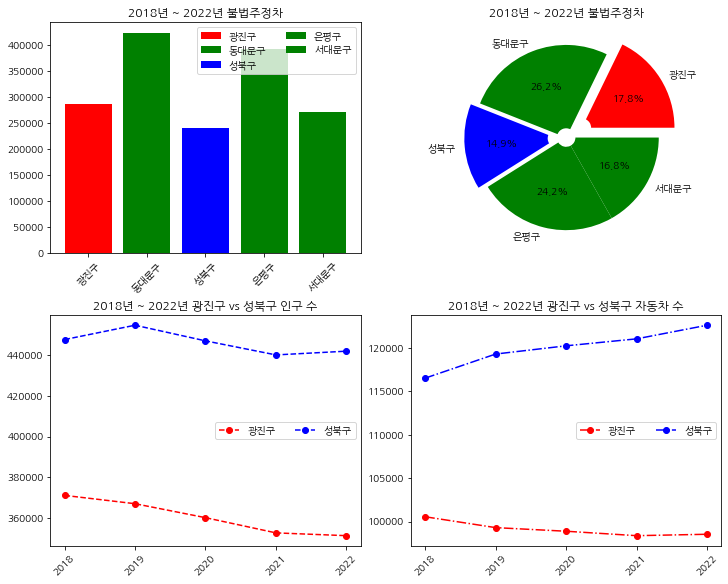

In [47]:
xs = np.sum(pd_f_name.iloc[1:, :])

fig, axes = plt.subplots(2,2, figsize = (10,8), layout = 'constrained')

#bar 
axes[0, 0].bar(xs.index, xs, color = ['r', 'g', 'b', 'g', 'g'], label = xs.index)
axes[0, 0].set_title("2018년 ~ 2022년 불법주정차")
axes[0, 0].set_xticklabels(xs.index, rotation = 45)
axes[0, 0].legend(['광진구', '동대문구', '성북구', '은평구', '서대문구'], ncols = 2)

#explode를 위한 list
ex_array = np.zeros(len(xs.index))
ex_array[0] = 0.2 # (광진구)중심점에서 부터 얼마나 많이 떨어져 나올지 하는 숫자
ex_array[2] = 0.1 # (성북구)
#ex_array[-2] = 0.1 # (서대문구)
#pie
axes[0, 1].pie(xs, colors = ['r', 'g', 'b', 'g', 'g'], labels = xs.index, 
               autopct='%1.1f%%', 
               explode = ex_array, 
               wedgeprops = dict(width=0.9)
              )
axes[0, 1].set_title("2018년 ~ 2022년 불법주정차")

#인구수
x = pop.iloc[1:, :]
axes[1,0].plot(x['광진구'].index, x['광진구'], 'ro--', label = x['광진구'])
axes[1,0].plot(x['성북구'].index, x['성북구'], 'bo--', label = x['성북구'])
axes[1,0].set_title('2018년 ~ 2022년 광진구 vs 성북구 인구 수')
axes[1, 0].xaxis.set_ticks([2018, 2019, 2020, 2021, 2022])
axes[1, 0].set_xticklabels([2018, 2019, 2020, 2021, 2022], rotation = 45)
axes[1, 0].legend(['광진구', '성북구'], loc = 'center right', ncols = 2)

#자동차
y = car.iloc[1:, :]
axes[1, 1].plot(y['성북구'].index, y['광진구'], 'ro-.', label = y['광진구'])
axes[1, 1].plot(y['성북구'].index, y['성북구'], 'bo-.', label = y['성북구'])
axes[1, 1].set_title('2018년 ~ 2022년 광진구 vs 성북구 자동차 수')
axes[1, 1].xaxis.set_ticks([2018, 2019, 2020, 2021, 2022])
axes[1, 1].set_xticklabels([2018, 2019, 2020, 2021, 2022], rotation = 45)
axes[1, 1].legend(['광진구', '성북구'], loc = 'center right', ncols = 2)

In [26]:
# 자동차 밀도 =  1인당 차량 대수 * 인구밀도 = (자동차/인구) * (인구/면적) == 자동차/면적
car_den_Gwang = pd_po.loc[:, '인구밀도 (명/㎢)'] * pop_car_df.loc[2018:, '광진구']
car_den_Sung = pd_po.loc[:, '인구밀도 (명/㎢).1'] * pop_car_df.loc[2018:, '성북구']

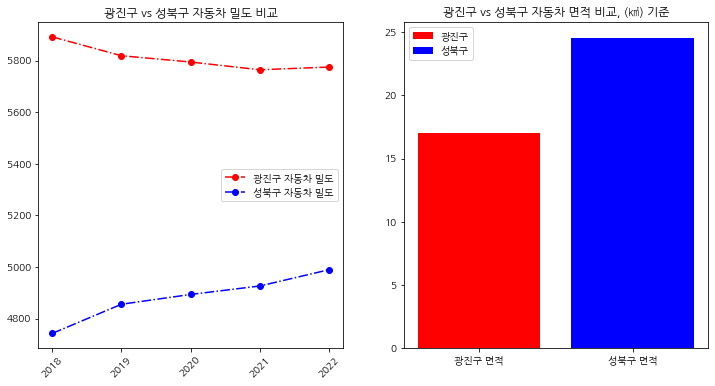

In [27]:
car_den = pd.concat((car_den_Gwang, car_den_Sung), axis = 1)
car_den.columns = ['광진구 자동차 밀도', '성북구 자동차 밀도']


fig1, axe = plt.subplots(1,2, figsize=(12,6))
axe[0].plot(car_den.index, car_den['광진구 자동차 밀도'], 'ro-.', label = '광진구 자동차 밀도')
axe[0].plot(car_den.index, car_den['성북구 자동차 밀도'], 'bo-.', label = '성북구 자동차 밀도')
axe[0].xaxis.set_ticks([2018, 2019, 2020, 2021, 2022])
axe[0].set_xticklabels([2018, 2019, 2020, 2021, 2022], rotation = 45)
axe[0].set_title('광진구 vs 성북구 자동차 밀도 비교')
axe[0].legend(loc = 'center right')

axe[1].bar(['광진구 면적', '성북구 면적'], pd_po.loc[2022, ['면적 (㎢)', '면적 (㎢).1']], color = ['r', 'b'], label = pd_po.loc[2022, ['면적 (㎢)', '면적 (㎢).1']])
axe[1].set_title('광진구 vs 성북구 자동차 면적 비교, (㎢) 기준')
axe[1].legend(['광진구', '성북구'])

#성북구가 면적도 넓고, 자동차 등록대수도 더 많은데도 불구하고 광진구가 단위면적당 자동차 대수가 더 많다는 것은
#결국 주차문제를 발생 시킬 확률이 더 높다.

In [28]:
# 광진구 유입 and 유출 자동차 수
inout = '광진구 입출입 차수1.csv'
pd_inout = pd.read_csv(inout, encoding = 'cp949')
g1 = pd_inout.drop(['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'], axis = 1).set_index(['Unnamed: 0', 'Unnamed: 1'])
G_inner = g1.iloc[-1, 0].replace(',', '')
G_out = g1.iloc[-1, 1].replace(',', '')
array = np.array([G_inner, G_out]).astype(np.int64)
array

# 성북구 유입 and 유출 자동차 수
f_name = '성북구 입출입 차수1.csv'
cp_data = pd.read_csv(f_name, encoding = 'cp949')
cp_data.head()

cp_data.drop([1], axis = 0, inplace = True)
cp_data = cp_data.set_index('Unnamed: 0')
cp_data.columns = ['유입', '유출']
cp_data.index.names = ([''])
cp_data = cp_data.stack().unstack(level = 0)
cp_data

,성북
유입,"400,161,223"
유출,"390,281,171"


In [34]:
G_inout = pd.DataFrame(array)
G_inout.columns = ['광진구']
G_inout.index = ['유입', '유출']
G_inout

tot_data = pd.concat((G_inout, cp_data), axis = 1)
tot_data = tot_data.unstack()
tot_data = tot_data.reset_index()
tot_data.columns = ['지역', '유입유출', '명수']

tot_data.iloc[2,2] = tot_data.iloc[2,2].replace(',', '')
tot_data.iloc[3,2] = tot_data.iloc[3,2].replace(',', '')
tot_data['명수'] = tot_data['명수'].astype(np.int64)

#tot_data['명수'][0] = tot_data['명수'][0] + tot_data['명수'][1]
#tot_data['명수'][2] = tot_data['명수'][2] + tot_data['명수'][3]

#tot_data.drop([1, 3], axis = 0, inplace = True)
tot_data

,지역,유입유출,명수
0,광진구,유입,653138443
1,광진구,유출,688243410
2,성북,유입,400161223
3,성북,유출,390281171


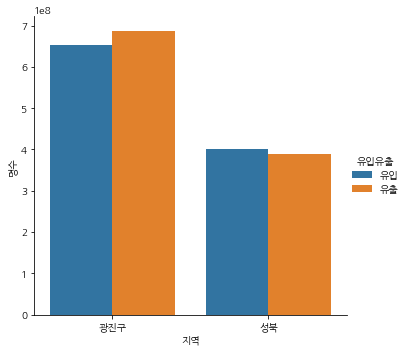

In [42]:
sns.catplot(data = tot_data, x = '지역', y = '명수', kind = 'bar', hue = '유입유출')